## By Adrian Abeyta and Noemi Turner

In [31]:
import importlib
import numpy as np

import utils
importlib.reload(utils)
import plot_utils as pu
importlib.reload(pu)
from mysklearn import myutils
importlib.reload(myutils)
from mypytable import MyPyTable
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [3]:
data = MyPyTable()
data.load_from_file("input_data/forbes_data.csv")

# Clean Data

In [35]:
num_rows, num_cols = data.get_shape()
data.convert_to_numeric()
y_data = utils.discritize_data_by_million(data)


# Split Data

In [40]:
col = utils.get_column(data.data, data.column_names, "earnings_($ million)")
X_train, X_test, y_train, y_test = myevaluation.train_test_split(col, y_data)

# KNN Classifier

In [45]:
nbc = MyNaiveBayesClassifier()
print(y_train)
nbc.fit([X_train], y_train)
y_pred = nbc.predict(X_test)


['low', 'medium', 'high', 'high', 'low', 'medium', 'high', 'low', 'medium', 'low', 'high', 'low', 'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low', 'high', 'high', 'high', 'high', 'medium', 'high', 'low', 'low', 'high', 'medium', 'medium', 'low', 'high', 'high', 'high', 'high', 'low', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'low', 'medium', 'high', 'low', 'medium', 'high', 'medium', 'medium', 'medium', 'low', 'high', 'medium', 'medium', 'high', 'medium', 'low', 'high', 'low', 'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'low', 'medium', 'high', 'medium', 'medium', 'high', 'medium', 'low', 'medium', 'high', 'high', 'high', 'high', 'high', 'low', 'high', 'low', 'high', 'medium', 'medium', 'low', 'medium', 'low', 'low', 'medium', 'low', 'medium', 'high', 'medium', 'high', 'medium', 'high', 'low', 'medium', 'high', 'high', 'medium', 'high', 'low', 'medium', 'high', 'medium', 'low', 'low', 'medium', 'high', 'high', 'low', 'medium',

IndexError: list index out of range

# Map Data

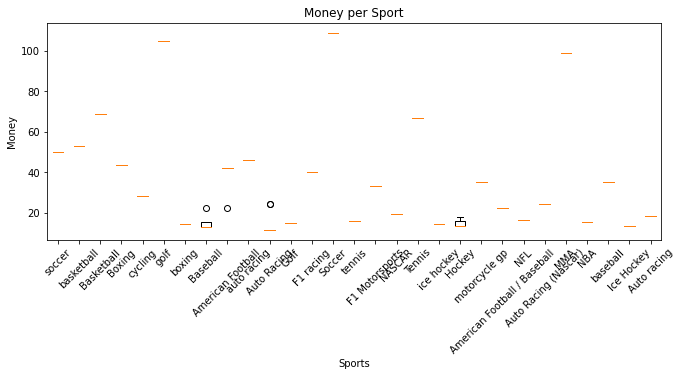

In [44]:
data.remove_rows_with_missing_values()
#print(table.data)
sports = data.get_column("Sport")
money = data.get_column("earnings_($ million)")
#plot_utils.generate_box_plot(rotten_tomatoes, )
sports_split = utils.split_string_count(sports)
unique_sports = utils.get_genres(sports_split)
total_scores = utils.divide_ratings(unique_sports, sports, money)
for row in total_scores:
    while('' in row):
        row.remove('')
pu.generate_box_plot(total_scores, unique_sports, "Sports", "Money", "Money per Sport")